In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

$$ \partial_t \psi = D \Delta \psi(x,t) - \kappa \psi(x,t) + \eta(x,t) + \xi(x) $$

In [9]:
df = pd.read_csv("/Users/schimmenti/Desktop/HousingPricesItaly/%i%i_values.csv" % (year, semester), sep=';', header=1, low_memory=False, skiprows=0)

In [12]:
df['Descr_Tipologia'].unique()

array(['Abitazioni civili', 'Box', 'Posti auto coperti',
       'Posti auto scoperti', 'Magazzini', 'Negozi', 'Uffici',
       'Laboratori', 'Ville e Villini', 'Capannoni industriali',
       'Capannoni tipici', 'Abitazioni di tipo economico', 'Autorimesse',
       'Uffici strutturati', 'Centri commerciali', 'Abitazioni signorili',
       'Abitazioni tipiche dei luoghi'], dtype=object)

In [ ]:
data = []
for year in range(2004, 2025):
    for semester in [1,2]:
        df = pd.read_csv("/Users/schimmenti/Desktop/HousingPricesItaly/%i%i_values.csv" % (year, semester), sep=';', header=1, low_memory=False, skiprows=0)
        #df_zone = pd.read_csv("/Users/schimmenti/Desktop/HousingPricesItaly/QI_1220730_1_20041_ZONE.csv", sep=';', header=1, low_memory=False, skiprows=0)
        df['Loc_min'] = df['Loc_min'].str.replace(",",".")
        df['Loc_min'] = df['Loc_min'].astype(float)
        df['Loc_max'] = df['Loc_max'].str.replace(",",".")
        df['Loc_max'] = df['Loc_max'].astype(float)
        df = df[df['Descr_Tipologia'].isin(['Abitazioni civili', 'Abitazioni di tipo economico','Abitazioni tipiche dei luoghi'])].groupby(['Comune_amm']).mean(numeric_only=True).drop(['Comune_ISTAT', 'Cod_Tip', 'Unnamed: 21'], axis=1)
        df['value'] = (df['Compr_max'] + df['Compr_min'])/2
        df['rent'] = (df['Loc_max'] + df['Loc_min'])/2
        cities = pd.read_csv("/Users/schimmenti/Desktop/HousingPricesItaly/gi_comuni.csv",sep=';')
        df = pd.merge(df.reset_index(drop=False), cities[['codice_belfiore','lat','lon']], left_on=['Comune_amm'], right_on=['codice_belfiore'] )[['Comune_amm', 'value','rent','lat','lon']]
        df.rename({'Comune_amm' : 'code'}, axis=1, inplace=True)
        df['lat'] = df['lat'].str.replace(",",".").astype(float)
        df['lon'] = df['lon'].str.replace(",",".").astype(float)
        df.dropna(axis=0, inplace=True)
        df['year'] = year
        df['semester'] = semester
        data.append(df)
        #x = np.log10(df['rent']/np.nanmean(df['rent']))
        #y = np.log10(df['value']/np.nanmean(df['value']))
        #mask = np.isfinite(x)*np.isfinite(y)
        #plt.scatter(year + semester/2, stats.linregress(x[mask],y[mask] ).slope.item())
data = pd.concat(data)

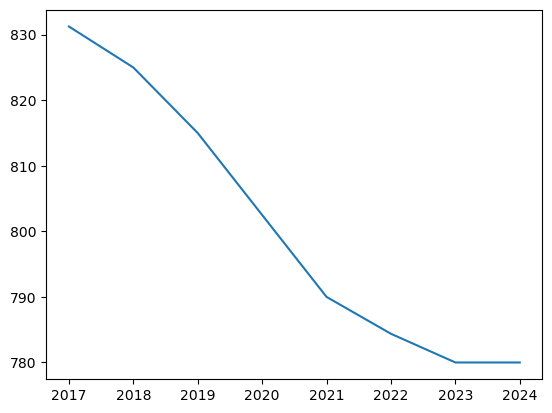

In [16]:
plt.plot(data[data['year']>=2017].groupby('year').median(numeric_only=True)['value'])

/Users/schimmenti/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/schimmenti/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/schimmenti/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/schimmenti/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/schimmenti/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/schimmenti/anaconda3/lib/python3.

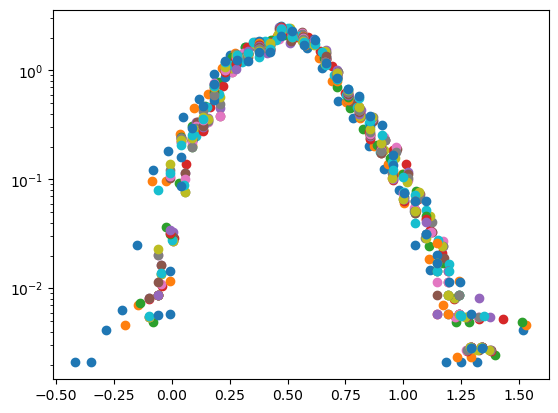

In [180]:
for year, yd in data.groupby(['year']):
    x = np.log10(yd.groupby(['code']).mean(numeric_only=True)['rent'])
    hist, edges = np.histogram(x[np.isfinite(x)],bins=30, density=True)
    plt.scatter(edges[:-1],hist)
plt.yscale('log')
plt.show()

In [ ]:
plt.plot(data.groupby(['year']).quantile(0.9,numeric_only=True)['rent'])
plt.plot(data.groupby(['year']).quantile(0.7,numeric_only=True)['rent'])

In [ ]:
plt.scatter(df['lon'].values, df['lat'].values,c=np.log(df['value'].values/np.nanmean(df['value'].values)), cmap='seismic',s=1, vmin=-1.5, vmax=1.5)
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

In [ ]:
plt.scatter(df['lon'].values, df['lat'].values,c=np.log(df['rent'].values/np.nanmean(df['rent'].values)), cmap='seismic',s=1, vmin=-1.5, vmax=1.5)
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()